### We will run CNN completely with Keras
#### WE will pick data from keras data set
#### Use image data generator for some data changes and apply random data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
import tensorflow_datasets as tfds
from tensorflow import keras

In [2]:

cifar=keras.datasets.cifar10

In [3]:
(x_train,y_train),(x_test,y_test)=cifar.load_data()

In [4]:
x_train.shape,y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [5]:
x_train.max()

255

### Lets do some data preprocessing


In [6]:
x_train=x_train/255
x_test=x_test/255

### Sample data

[8]


its right


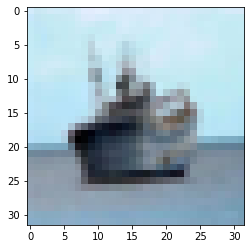

In [7]:
sample=x_train[567]
plt.imshow(sample)
print(y_train[567])
print('\n')
print('its right')

#### lets encode the y data

In [8]:
y_train=tf.one_hot(y_train,depth=10)
y_train=tfds.as_numpy(y_train)

In [9]:
y_train=np.reshape(y_train,[-1,10])

In [10]:
y_train.shape

(50000, 10)

In [11]:
y_test=tf.one_hot(y_test,depth=10)
y_test=tfds.as_numpy(y_test)
y_test=np.reshape(y_test,[-1,10])

### Now we will use Keras model witout Image data generator.

In [12]:
from tensorflow.keras.layers import Dense,Flatten,Convolution2D,Dropout,MaxPool2D

In [13]:
model=keras.Sequential()

#### add some layers

In [14]:
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10))

### Now lets compile the model


In [19]:
model.compile(optimizer='adam',
                loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [20]:
y_train.shape

(50000, 10)

### Lets train the model

In [21]:
model.fit(x_train,y_train,epochs=10)

Train on 50000 samples
Epoch 1/10
50000/50000 [==============================] - 14s 281us/sample - loss: 1.9008 - accuracy: 0.3140
Epoch 2/10
50000/50000 [==============================] - 19s 376us/sample - loss: 1.7479 - accuracy: 0.3753
Epoch 3/10
50000/50000 [==============================] - 26s 528us/sample - loss: 1.6939 - accuracy: 0.3966
Epoch 4/10
50000/50000 [==============================] - 16s 316us/sample - loss: 1.6610 - accuracy: 0.4073
Epoch 5/10
50000/50000 [==============================] - 18s 367us/sample - loss: 1.6365 - accuracy: 0.4155
Epoch 6/10
50000/50000 [==============================] - 17s 346us/sample - loss: 1.6189 - accuracy: 0.4227
Epoch 7/10
50000/50000 [==============================] - 19s 373us/sample - loss: 1.6109 - accuracy: 0.4240
Epoch 8/10
50000/50000 [==============================] - 18s 358us/sample - loss: 1.5993 - accuracy: 0.4274
Epoch 9/10
50000/50000 [==============================] - 15s 297us/sample - loss: 1.5943 - accuracy: 0.4

### We see the accuracy is bit low.
#### Lets try for some more epochs

In [22]:
model.fit(x_train,y_train,epochs=25)

Train on 50000 samples
Epoch 1/25
50000/50000 [==============================] - 12s 244us/sample - loss: 1.5759 - accuracy: 0.4372
Epoch 2/25
50000/50000 [==============================] - 10s 210us/sample - loss: 1.5699 - accuracy: 0.4384
Epoch 3/25
50000/50000 [==============================] - 18s 351us/sample - loss: 1.5631 - accuracy: 0.4386
Epoch 4/25
50000/50000 [==============================] - 16s 317us/sample - loss: 1.5592 - accuracy: 0.4427
Epoch 5/25
50000/50000 [==============================] - 14s 284us/sample - loss: 1.5582 - accuracy: 0.4425
Epoch 6/25
50000/50000 [==============================] - 16s 318us/sample - loss: 1.5477 - accuracy: 0.4468
Epoch 7/25
50000/50000 [==============================] - 20s 397us/sample - loss: 1.5461 - accuracy: 0.4475
Epoch 8/25
50000/50000 [==============================] - 16s 318us/sample - loss: 1.5379 - accuracy: 0.4505
Epoch 9/25
50000/50000 [==============================] - 16s 321us/sample - loss: 1.5334 - accuracy: 0.4

#### It is the same
#### now we will add some convolution layers to it and try.

In [37]:
model=keras.Sequential()
Dense,Flatten,Convolution2D,Dropout
model.add(Convolution2D(filters=32,kernel_size=[4,4],input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Convolution2D(filters=64,kernel_size=[4,4],activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Convolution2D(filters=128,kernel_size=[4,4],activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(10))

In [38]:
model.compile(optimizer='adam',
             loss=keras.losses.CategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=5)


Train on 93200 samples
Epoch 1/5
93200/93200 [==============================] - 116s 1ms/sample - loss: 1.9610 - accuracy: 0.2545
Epoch 2/5
93200/93200 [==============================] - 113s 1ms/sample - loss: 1.7177 - accuracy: 0.3682
Epoch 3/5
93200/93200 [==============================] - 114s 1ms/sample - loss: 1.5760 - accuracy: 0.4326
Epoch 4/5
93200/93200 [==============================] - 112s 1ms/sample - loss: 1.4904 - accuracy: 0.4636
Epoch 5/5
93200/93200 [==============================] - 111s 1ms/sample - loss: 1.4306 - accuracy: 0.4864


### You can see as we addedd the convolution layers the accuracy got increased

#### Lets go with some more epochs

In [16]:
model.fit(x_train,y_train,epochs=25)

Train on 50000 samples
Epoch 1/25
50000/50000 [==============================] - 62s 1ms/sample - loss: 1.6260 - accuracy: 0.4019
Epoch 2/25
50000/50000 [==============================] - 59s 1ms/sample - loss: 1.2567 - accuracy: 0.5573
Epoch 3/25
50000/50000 [==============================] - 60s 1ms/sample - loss: 1.0884 - accuracy: 0.6243
Epoch 4/25
50000/50000 [==============================] - 60s 1ms/sample - loss: 0.9748 - accuracy: 0.6663
Epoch 5/25
50000/50000 [==============================] - 60s 1ms/sample - loss: 0.8960 - accuracy: 0.6937
Epoch 6/25
50000/50000 [==============================] - 61s 1ms/sample - loss: 0.8280 - accuracy: 0.7180
Epoch 7/25
50000/50000 [==============================] - 60s 1ms/sample - loss: 0.7722 - accuracy: 0.7374
Epoch 8/25
50000/50000 [==============================] - 59s 1ms/sample - loss: 0.7151 - accuracy: 0.7559
Epoch 9/25
50000/50000 [==============================] - 61s 1ms/sample - loss: 0.6742 - accuracy: 0.7685
Epoch 10/25
50

In [17]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 4s 428us/sample - loss: 1.4832 - accuracy: 0.6841


[1.4832357243537904, 0.6841]

### Lets do some image data generator and again we will run the same

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
image_gen=ImageDataGenerator(rotation_range=30,
                          width_shift_range=0.1,
                          height_shift_range=0.1,
                          rescale=1/255,
                          shear_range=0.2,
                          zoom_range=0.2,
                          horizontal_flip=True,
                          fill_mode='nearest')

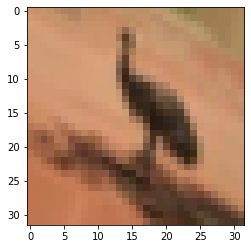

In [30]:
plt.imshow(image_gen.random_transform(x_train[4356]))

In [31]:
image_gen.fit(x_train)

In [ ]:
model=keras.Sequential()
Dense,Flatten,Convolution2D,Dropout
model.add(Convolution2D(filters=32,kernel_size=[4,4],input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Convolution2D(filters=64,kernel_size=[4,4],activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Convolution2D(filters=128,kernel_size=[4,4],activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(10))
model.compile(optimizer='adam',
             loss=keras.losses.CategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
model.fit(image_gen.flow(x_train,y_train,batch_size=50),epochs=30)

In [33]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 4s 368us/sample - loss: 2.3052 - accuracy: 0.0998


[2.305220249557495, 0.0998]

### This is pretty bad 
### Now we will concatenate the image data generator to the input and then we will try.

In [ ]:
x_train.shape